In [47]:
import pandas as pd
import seaborn as sns

In [125]:
df = pd.read_csv("D:\Python\AB_NYC_2019.csv")

In [11]:
df.shape

(48906, 16)

In [12]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(38821, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [14]:
df["id"] = df["id"].astype(str)
df["host_id"] = df["host_id"].astype(str)
df["latitude"] = df["latitude"].astype(str)
df["longitude"] = df["longitude"].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  object 
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  object 
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  object 
 7   longitude                       38821 non-null  object 
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


# Categoricals

In [16]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [17]:
df["neighbourhood_group"].value_counts(normalize = True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [29]:
newdf = df["neighbourhood"].value_counts().reset_index()

In [30]:
newdf

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [36]:
newdf[newdf["count"]>1000].value_counts()

neighbourhood       count
Bedford-Stuyvesant  3141     1
Bushwick            1942     1
Crown Heights       1265     1
East Village        1489     1
Harlem              2204     1
Hell's Kitchen      1528     1
Upper East Side     1405     1
Upper West Side     1482     1
Williamsburg        3163     1
Name: count, dtype: int64

# Numeicals

In [38]:
df["price"].value_counts(bins = 5)

price
(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [42]:
bins = [0,50,100,150,200,300,10000]
df["price"].value_counts(bins = bins)

price
(50.0, 100.0]       14212
(100.0, 150.0]       8315
(150.0, 200.0]       5229
(-0.001, 50.0]       5176
(200.0, 300.0]       3710
(300.0, 10000.0]     2179
Name: count, dtype: int64

In [43]:
df["price"].skew()

23.673594295123014

In [44]:
df["price"].kurt()

953.4807356344944

In [46]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194


# Data Visualisation for Univariate Categorical Variables

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  object 
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  object 
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  object 
 7   longitude                       38821 non-null  object 
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [64]:
df["room_type"].value_counts()                      

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

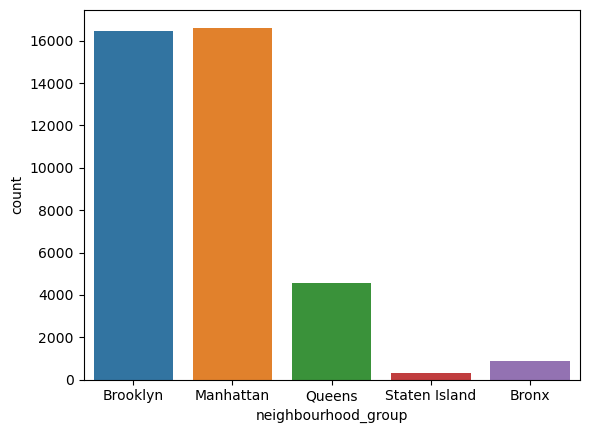

In [69]:
sns.countplot(data = df, x = "neighbourhood_group")

<Axes: xlabel='count', ylabel='room_type'>

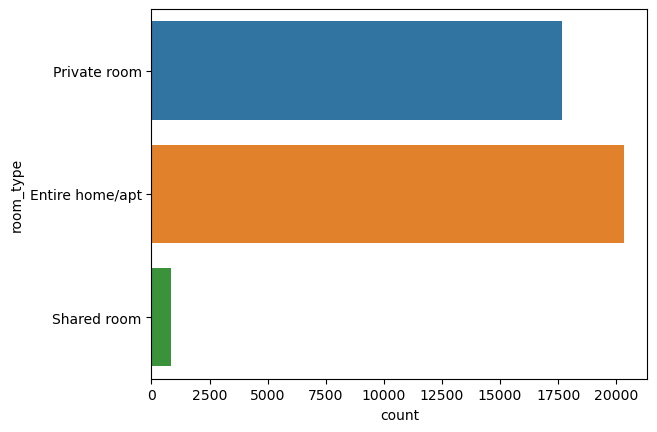

In [70]:
sns.countplot(data = df, y = "room_type")

<Axes: xlabel='count', ylabel='neighbourhood_group'>

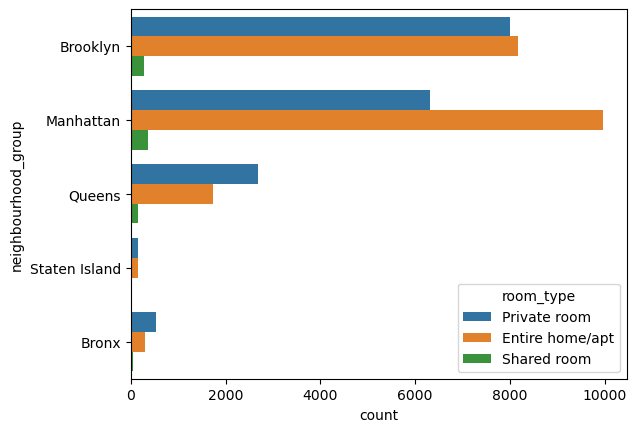

In [72]:
sns.countplot(data = df, y = "neighbourhood_group", hue = "room_type")

<Axes: ylabel='count'>

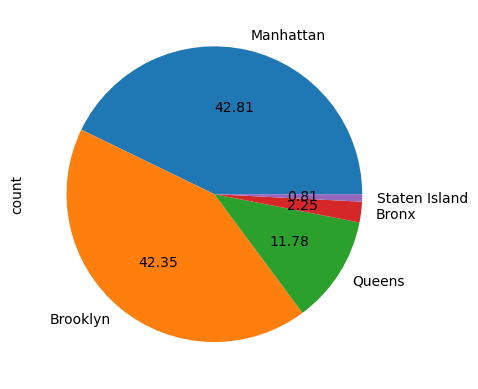

In [81]:
df["neighbourhood_group"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='neighbourhood_group'>

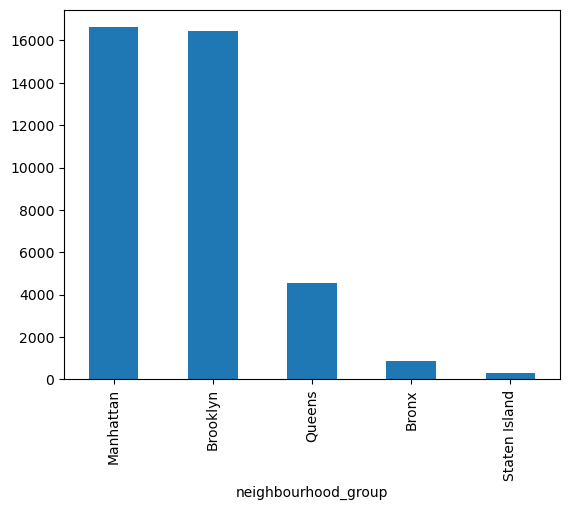

In [83]:
df["neighbourhood_group"].value_counts().plot(kind = "bar")

In [128]:
df = sns.load_dataset("titanic")

In [129]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
747,1,2,female,30.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
209,1,1,male,40.0,0,0,31.0000,C,First,man,True,A,Cherbourg,yes,True
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
468,0,3,male,NaN,0,0,7.7250,Q,Third,man,True,NaN,Queenstown,no,True
192,1,3,female,19.0,1,0,7.8542,S,Third,woman,False,NaN,Southampton,yes,False


In [95]:
df.shape

(891, 15)

<Axes: xlabel='class', ylabel='count'>

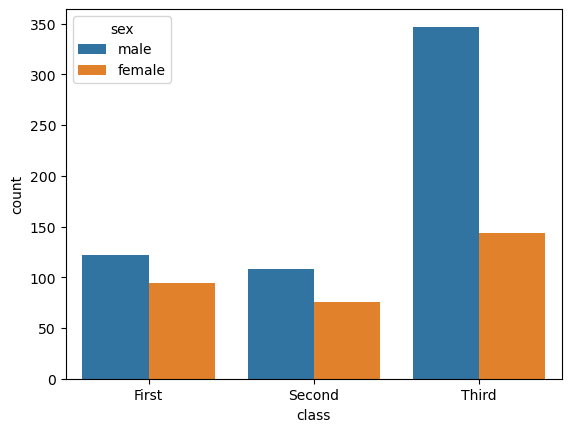

In [102]:
sns.countplot(data=df, x="class", hue = "sex")

<Axes: xlabel='survived', ylabel='count'>

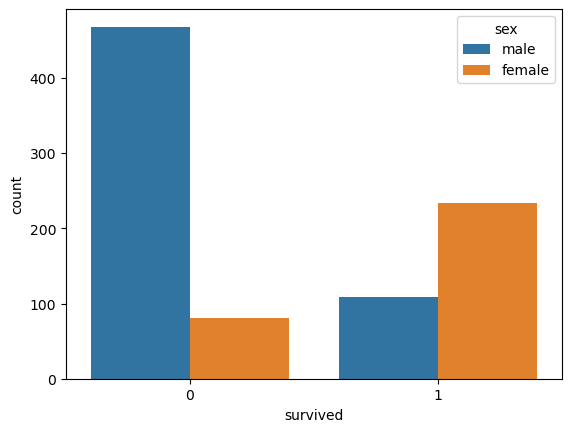

In [100]:
sns.countplot(data=df, x="survived", hue = "sex")

<Axes: ylabel='count'>

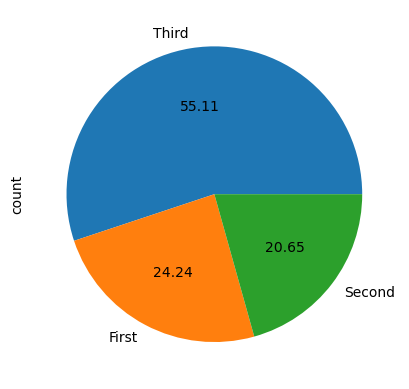

In [105]:
df["class"].value_counts().plot(kind="pie",autopct="%.2f")

# Data Visualisation for Univariate Numerical Variables

<Axes: xlabel='price', ylabel='Count'>

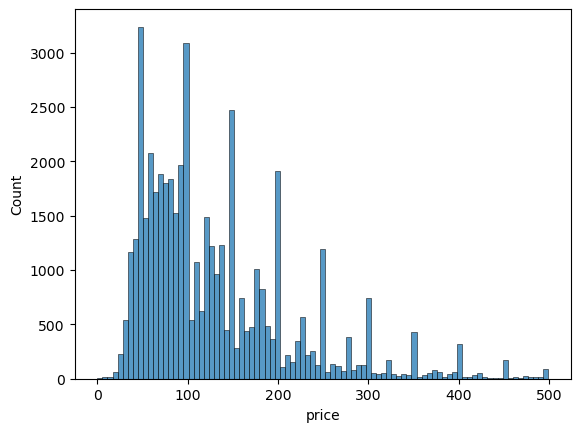

In [109]:
sns.histplot(data = df[df["price"]<500], x="price")

C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_28328\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

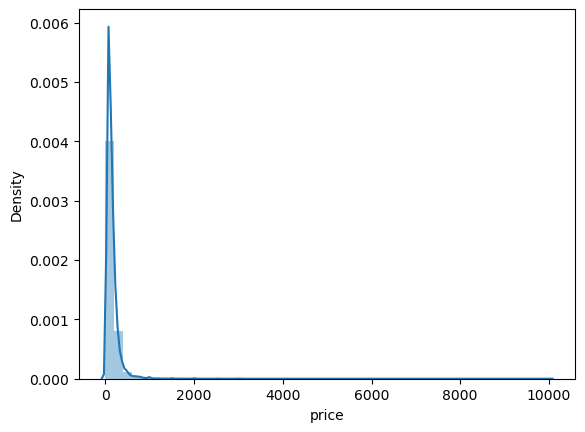

In [111]:
sns.distplot(df["price"])

In [112]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_28328\1603039620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])


<Axes: xlabel='availability_365', ylabel='Density'>

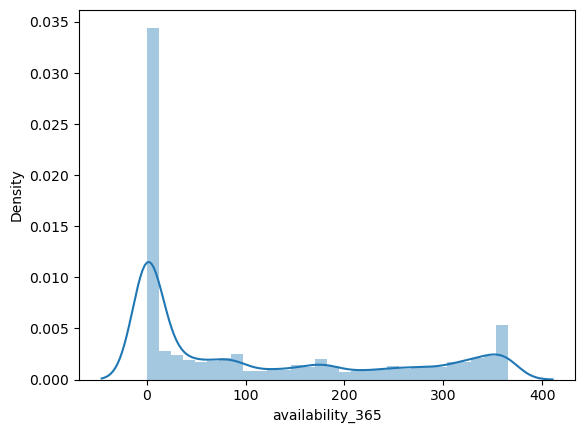

In [114]:
sns.distplot(df["availability_365"])

<Axes: >

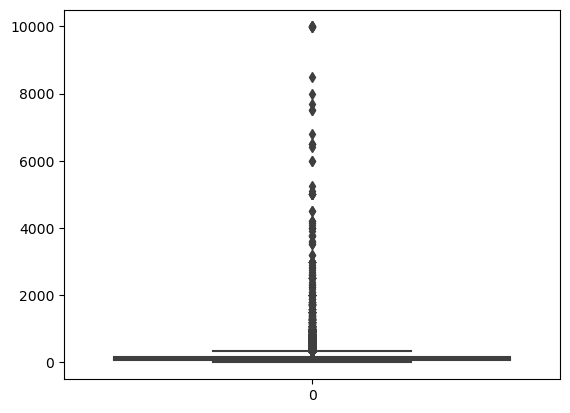

In [115]:
sns.boxplot(df["price"])

<Axes: >

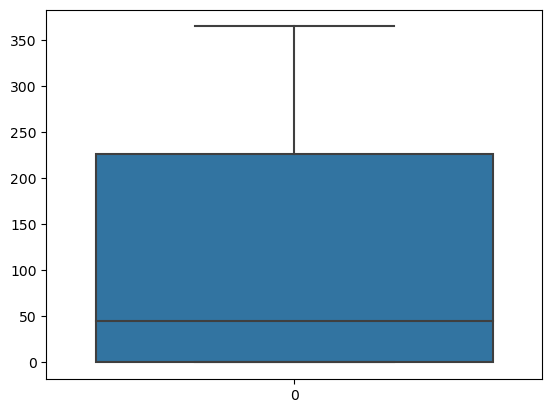

In [116]:
sns.boxplot(df["availability_365"])

In [118]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

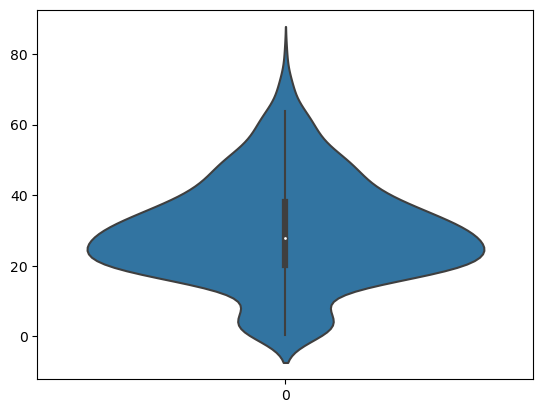

In [124]:
sns.violinplot(df["age"])

# Data Visualisation of Bivariate Categorical Values

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='class', ylabel='age'>

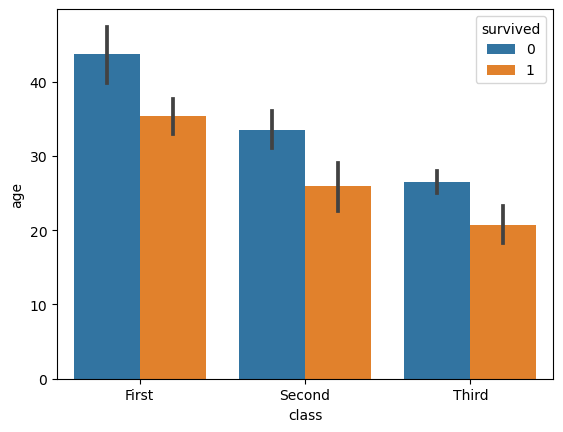

In [141]:
sns.barplot(x = "class", y = "age", hue="survived",data=df)

<Axes: xlabel='class', ylabel='age'>

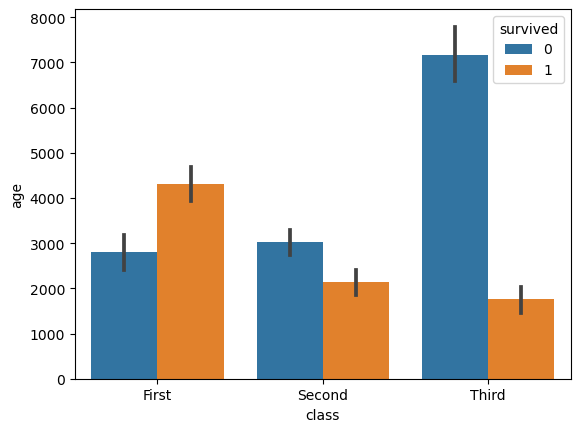

In [145]:
sns.barplot(x = "class", y = "age", hue="survived",data=df, estimator = "sum")

<Axes: xlabel='class', ylabel='age'>

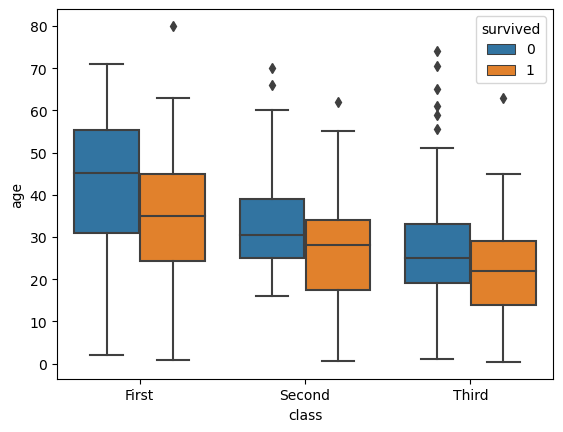

In [150]:
sns.boxplot(data=df, x="class", y = "age", hue="survived")

<Axes: xlabel='class', ylabel='age'>

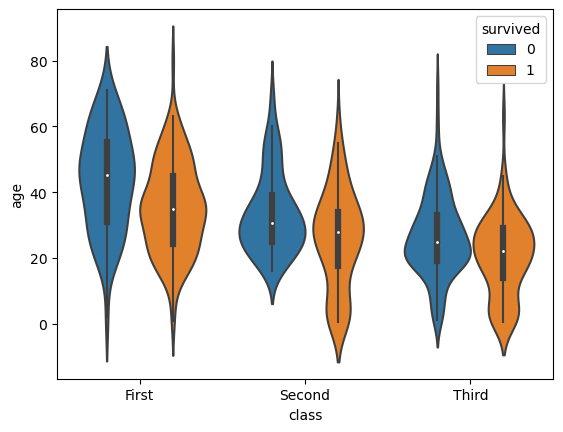

In [151]:
sns.violinplot(data=df, x="class", y = "age", hue="survived")

In [153]:
x = pd.crosstab(df["survived"], df["class"])

<Axes: xlabel='class', ylabel='survived'>

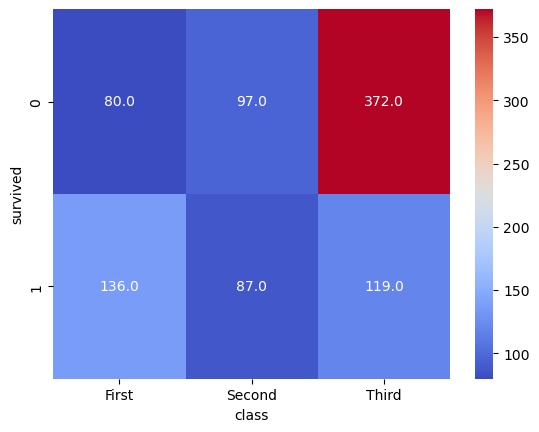

In [159]:
sns.heatmap(x, annot =True, fmt='.1f', cmap="coolwarm")

<Axes: xlabel='class', ylabel='age'>

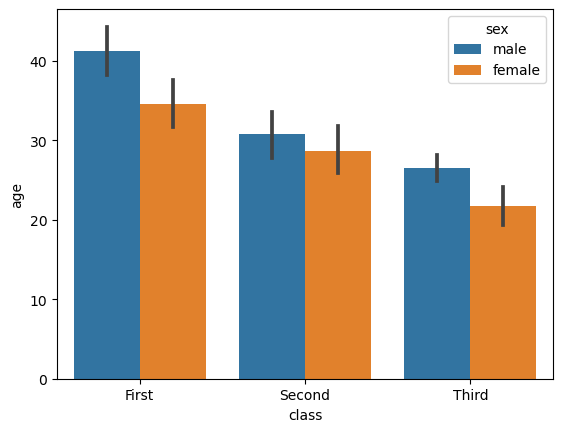

In [160]:
sns.barplot(data=df, x="class",y="age",hue="sex")

<Axes: xlabel='class', ylabel='age'>

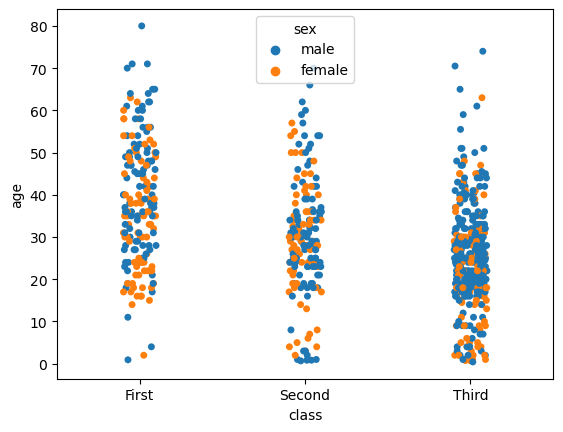

In [161]:
sns.stripplot(data=df, x="class",y="age",hue="sex")

In [164]:
y = sns.load_dataset("iris")
y.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [166]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

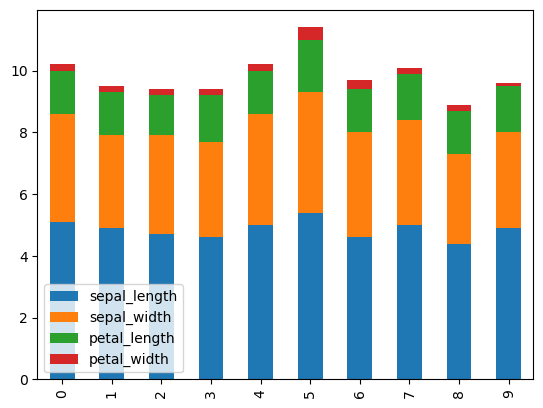

In [168]:
y.head(10).plot(kind = "bar", stacked=True)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


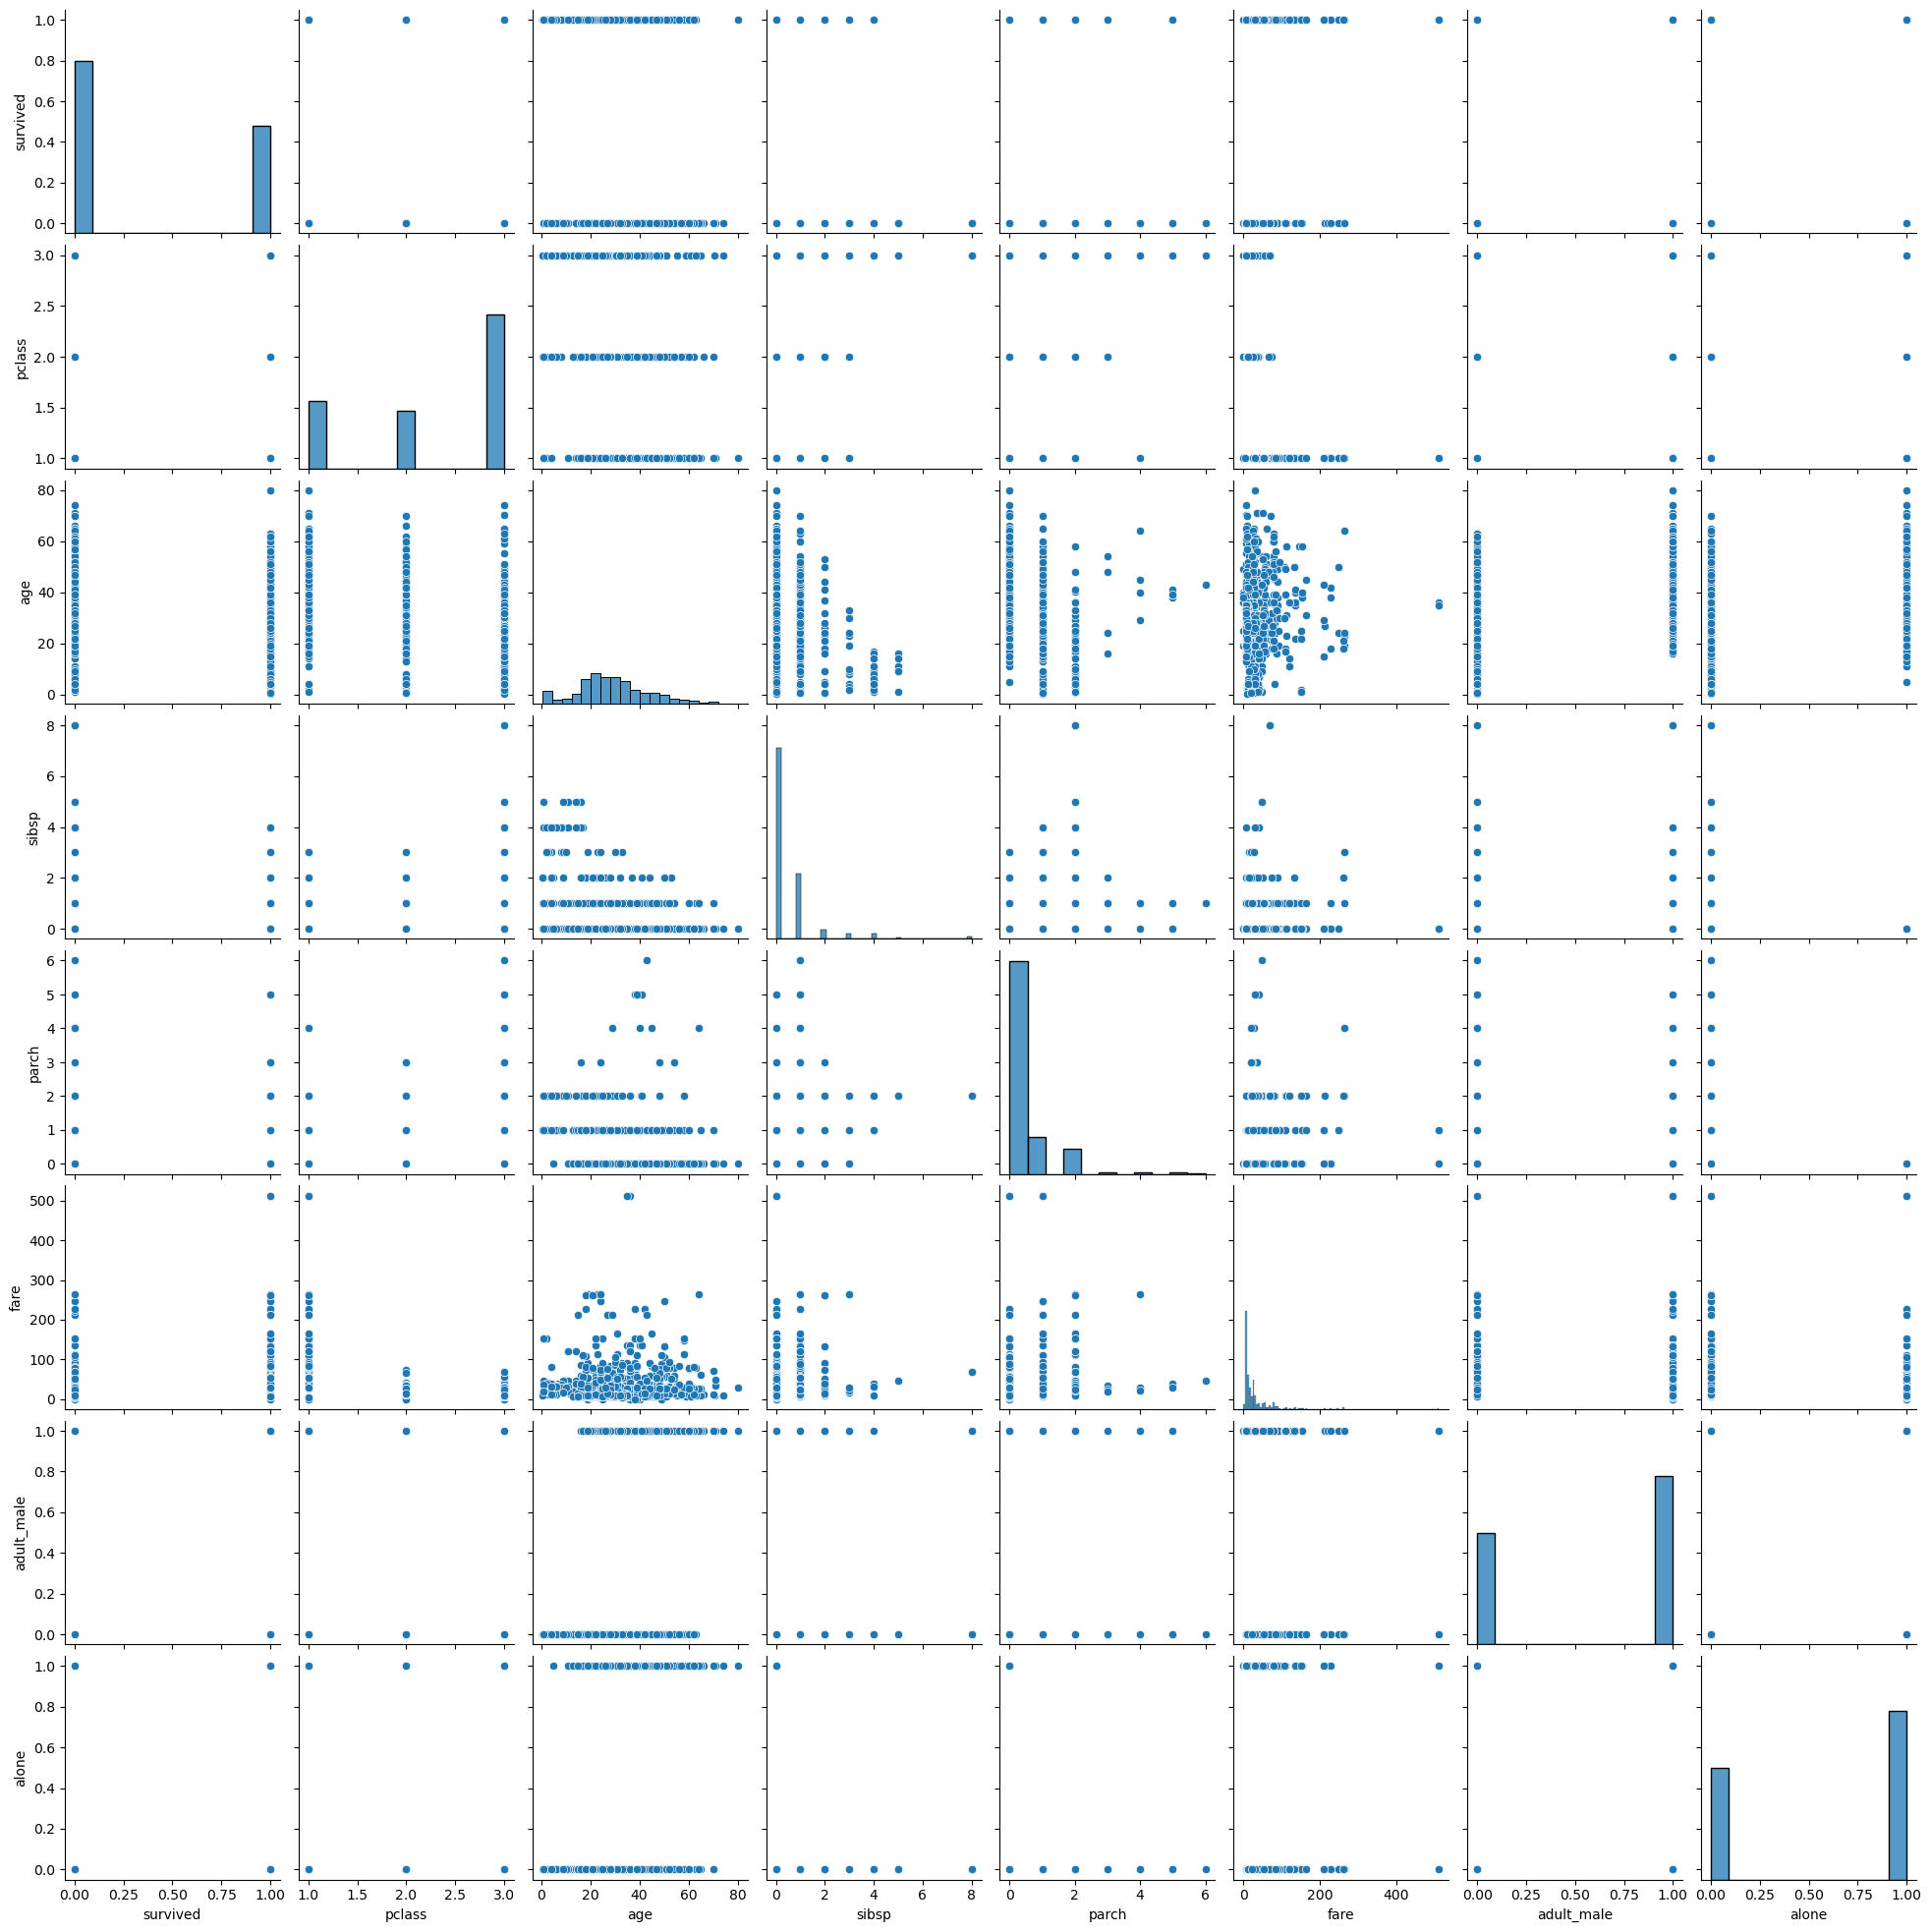

In [169]:
sns.pairplot(df)

In [170]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

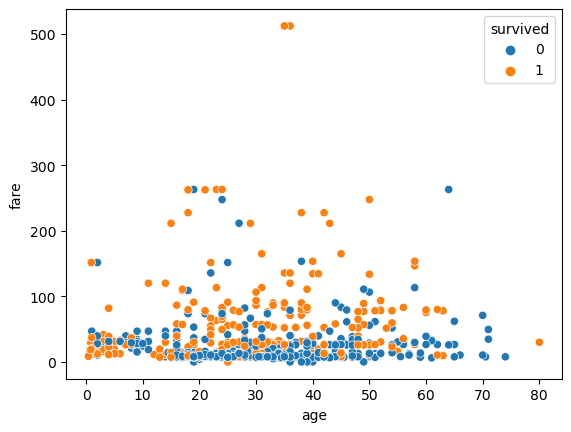

In [176]:
sns.scatterplot(x="age", y="fare", hue="survived", data = df)

In [177]:
z = sns.load_dataset("tips")

In [178]:
z.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

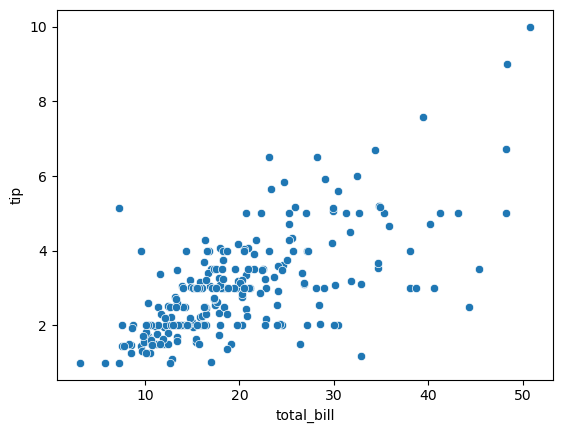

In [179]:
sns.scatterplot(x="total_bill", y="tip", data=z)

<Axes: xlabel='total_bill', ylabel='tip'>

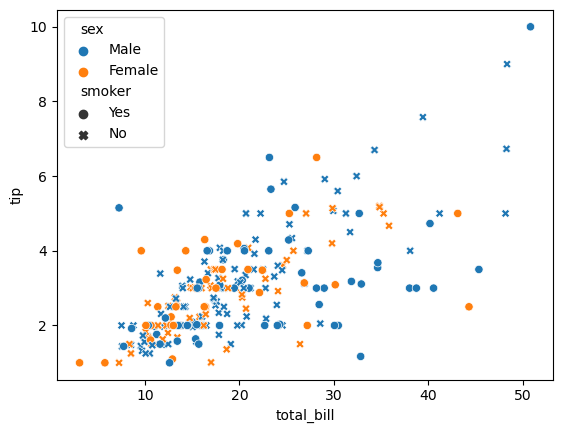

In [186]:
sns.scatterplot(x="total_bill", y="tip", hue = "sex", style = "smoker", data=z)

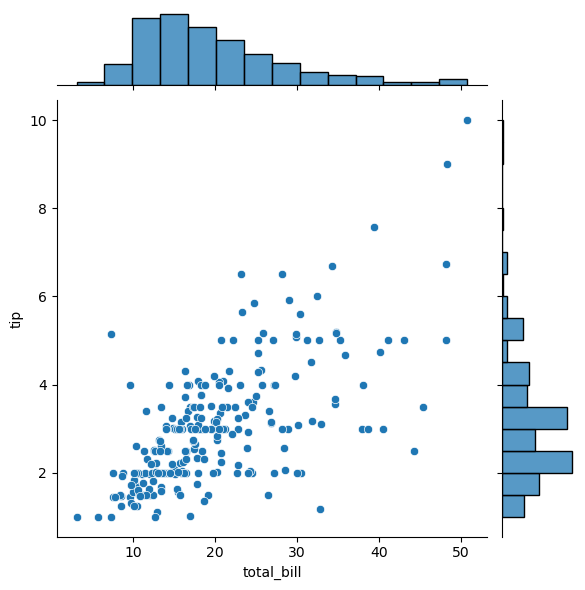

In [189]:
sns.jointplot(x="total_bill",y="tip", data=z)

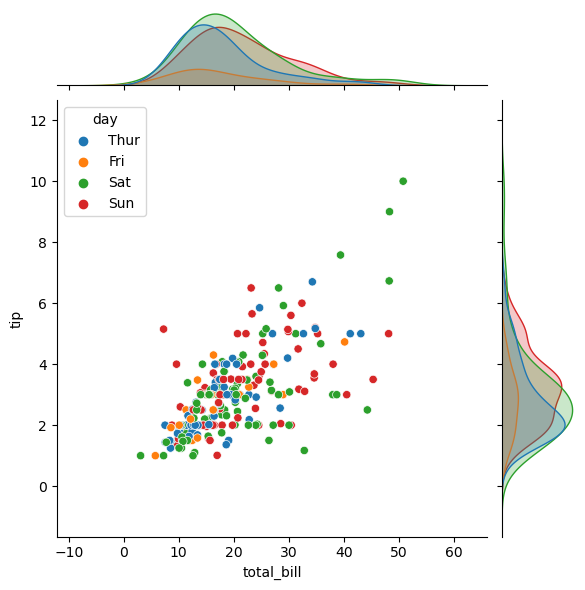

In [190]:
sns.jointplot(x="total_bill",y="tip",hue="day", data=z)

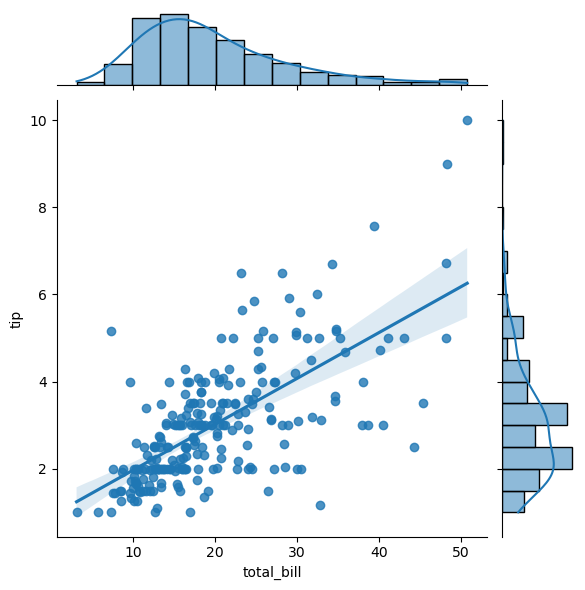

In [191]:
sns.jointplot(x="total_bill",y="tip", data=z, kind="reg")

In [192]:
z.corr()

ValueError: could not convert string to float: 'No'

In [193]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']